In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing data
b=pd.read_csv("books_one.csv")

In [3]:
b

,Unnamed: 0,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,9/16/2006
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,9/1/2004
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,eng,352,6333,11/1/2003
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,5/1/2004
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,eng,2690,41428,9/13/2004
...,...,...,...,...,...,...,...,...,...,...
11118,11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,eng,512,156,12/21/2004
11119,11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,eng,635,783,12/1/1988
11120,11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,eng,415,820,8/1/1993
11121,11121,45639,Poor People,William T. Vollmann,3.72,0060878827,eng,434,769,2/27/2007


In [4]:
#Drop unwanted columns
b=b.drop(['Unnamed: 0'], axis=1)
b.head(2)

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,9/16/2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,9/1/2004


In [5]:
#Set Publication_Date to year only
b['Publication_Date'] = pd.to_datetime(b['Publication_Date'], errors='coerce')
b['Publication_Date'] = b['Publication_Date'].dt.strftime('%Y')
b.head(2)

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,2004


In [6]:
#Sort data by Publication_Date from highest year to lowest
books_by_year=b.sort_values(["Publication_Date"], ascending=False)
books_by_year

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
9664,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,0060773758,eng,360,35275,2020
1070,3638,The Wish Giver: Three Tales of Coven Tree,Bill Brittain/Andrew Glass,3.83,0064401685,eng,192,2201,2019
10769,43940,Object Thinking,David West,3.99,0735619654,eng,334,155,2019
10335,41864,American Genesis: Captain John Smith and the F...,Alden T. Vaughan,3.43,0673393550,eng,224,23,2019
3981,14142,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,0061129739,eng,192,38148,2019
...,...,...,...,...,...,...,...,...,...
6816,25692,Agricola / Germania / Dialogue on Oratory,Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/...,3.95,0674990390,mul,384,87,1914
6488,24459,On Duties (De Officiis),Marcus Tullius Cicero/Walter Miller,3.96,0674990331,eng,448,111,1913
9371,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,0753812932,eng,144,332,1900
8177,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,eng,718,10608,NaN


In [53]:
#Check for missing data in each column
b.isnull().sum()

ID                  0
Title               0
Authors             0
Rating              0
ISBN                0
Language            0
  num_pages         0
Rating_Counts       0
Publication_Date    2
dtype: int64

<AxesSubplot:>

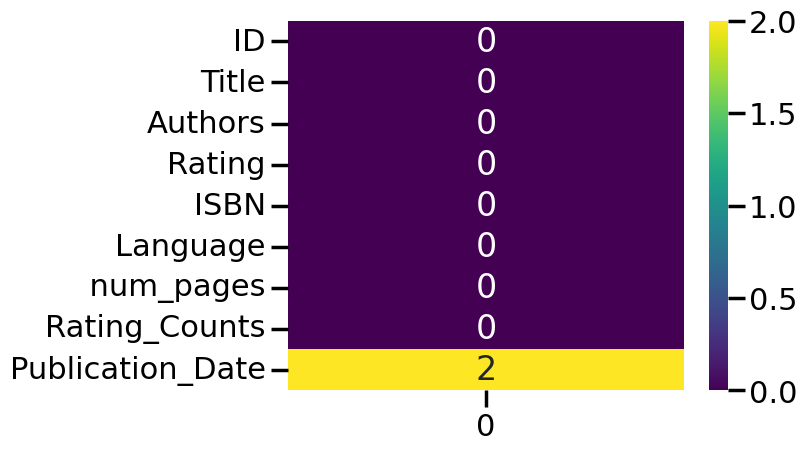

In [54]:
#Show missing values using heatmap
sns.heatmap(b.isnull().sum().to_frame(),annot=True,cmap='viridis')

In [55]:
#Remove missing data from Publication_Date column
b=b.dropna(subset=['Publication_Date'])

In [56]:
#Check for all unique years in column Publication_Date
b['Publication_Date'].unique()

array([2006., 2004., 2003., 2005., 2002., 1996., 2001., 2000., 1990.,
       1993., 1997., 1991., 2012., 1994., 1982., 1986., 1999., 1987.,
       1984., 2007., 1965., 1998., 1995., 1964., 1970., 2011., 1955.,
       1988., 1985., 1989., 1963., 2008., 2009., 1976., 1975., 1980.,
       1992., 1973., 2019., 1954., 2015., 1919., 1921., 1923., 1969.,
       1968., 1961., 1953., 1958., 1983., 1978., 1929., 1977., 1979.,
       1922., 1981., 2010., 1950., 1971., 1960., 1959., 2013., 2017.,
       2016., 1972., 1947., 1943., 1974., 1957., 2014., 2018., 1952.,
       1935., 1956., 1966., 1925., 1962., 1949., 1913., 1928., 1914.,
       1948., 1967., 1900., 2020., 1931., 1940.])

In [11]:
#Change all the values to integer in Publication_Date column
b['Publication_Date'] = pd.to_numeric(b['Publication_Date'], errors='coerce')

In [12]:
#Sort the books by the year of publication
books_2000_2022 = b[b['Publication_Date'] >= 2000]
books_1990_2000 = b[(b['Publication_Date'] >= 1990) & (b['Publication_Date'] < 2000)]
books_1980_1990 = b[(b['Publication_Date'] >= 1980) & (b['Publication_Date'] < 1990)]
books_1970_1980 = b[(b['Publication_Date'] >= 1970) & (b['Publication_Date'] < 1980)]
books_1960_1970 = b[(b['Publication_Date'] >= 1960) & (b['Publication_Date'] < 1970)]
books_1950_1960 = b[(b['Publication_Date'] >= 1950) & (b['Publication_Date'] < 1960)]
books_1940_1950 = b[(b['Publication_Date'] >= 1940) & (b['Publication_Date'] < 1950)]
books_1930_1940 = b[(b['Publication_Date'] >= 1930) & (b['Publication_Date'] < 1940)]
books_1920_1930 = b[(b['Publication_Date'] >= 1920) & (b['Publication_Date'] < 1930)]
books_1910_1920 = b[(b['Publication_Date'] >= 1910) & (b['Publication_Date'] < 1920)]
books_1900_1910 = b[(b['Publication_Date'] >= 1900) & (b['Publication_Date'] < 1910)]

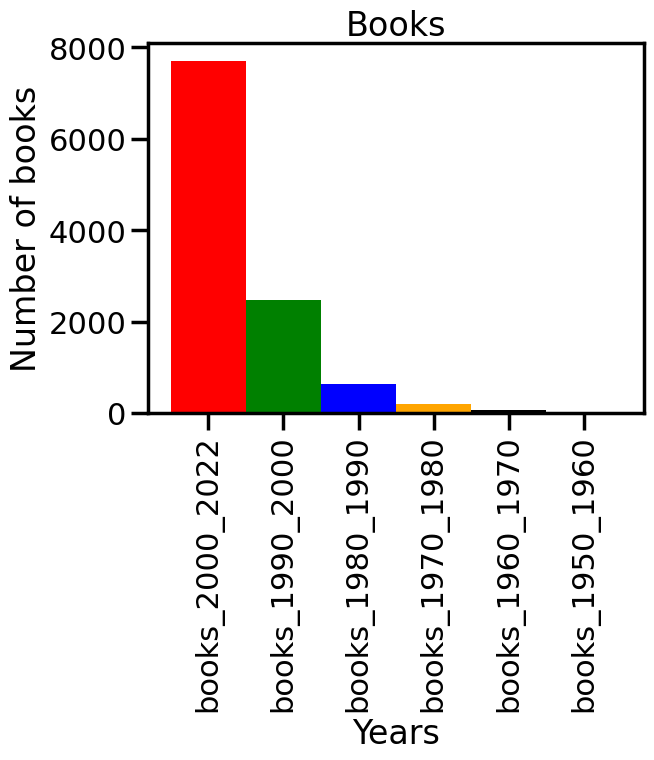

In [13]:
# Show the ratio of the books published in last six decades
left = [1,2,3,4,5,6]
tick_label = ["books_2000_2022", "books_1990_2000", "books_1980_1990", "books_1970_1980", "books_1960_1970", "books_1950_1960"]
height = [books_2000_2022.value_counts().sum(),books_1990_2000.value_counts().sum(),
          books_1980_1990.value_counts().sum(), books_1970_1980.value_counts().sum(), books_1960_1970.value_counts().sum(),
          books_1950_1960.value_counts().sum()]
plt.bar(left, height, tick_label = tick_label,
       width = 1,  color = ["red", "green", "blue", "orange", "black", "yellow"])
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.title("Books")
plt.xticks(rotation = 90)
plt.show()


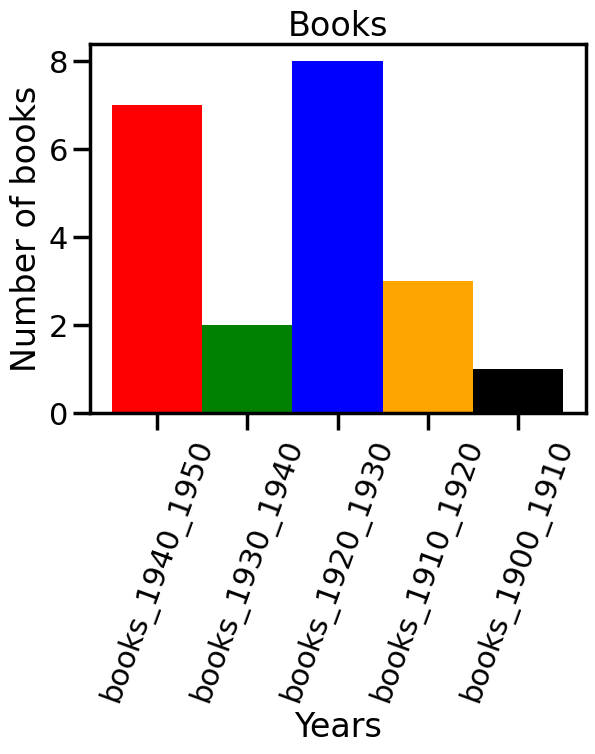

In [14]:
# Show the ratio of the books published from 1900 to 1950
left = [1,2,3,4,5]
tick_label = ["books_1940_1950", "books_1930_1940", "books_1920_1930", "books_1910_1920", "books_1900_1910"]
height = [books_1940_1950.value_counts().sum(),books_1930_1940.value_counts().sum(),
          books_1920_1930.value_counts().sum(), books_1910_1920.value_counts().sum(), books_1900_1910.value_counts().sum()]

plt.bar(left, height, tick_label = tick_label,
       width = 1,  color = ["red", "green", "blue", "orange", "black", "yellow"])
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.title("Books")
plt.xticks(rotation = 70)
plt.show()

In [15]:
#Check for all the languages in Language column
b['Language'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: Language, dtype: int64

In [16]:
#Replace Language values
b=b.replace({'Language' : { 'eng' : "English", "en-US":"English", "spa":"Spanish", "en-GB":"English", "fre":"French",
                            "ger":"German","jpn":"Japanese", "mul":"Other", "zho":"Other", "grc":"Other",
                            "por":"Portuguese", "en-CA":"English", "ita":"Other", "lat":"Other", "enm":"English",
                            "swe":"Other", "rus":"Other", "nor":"Other", "srp":"Other", "nl":"Other",
                            "tur":"Other", "gla":"Other", "ara":"Other", "msa":"Other", "ale":"Other", 
                            "glg":"Other", "wel":"Other"}})

In [17]:
#Check the Language column after the changes
b['Language'].value_counts()

English       10540
Spanish         218
French          144
German           99
Other            66
Japanese         46
Portuguese       10
Name: Language, dtype: int64

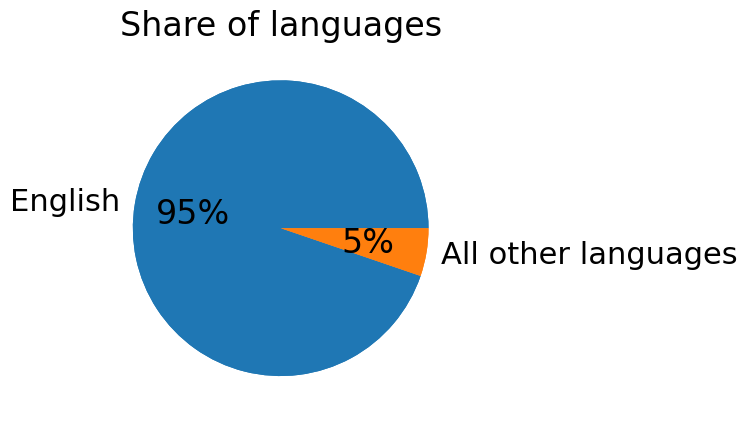

In [18]:
#Show the share of all other languages vs English
x = [10540, 583]
labels = ["English", "All other languages"]
colors = ["tab:blue", "tab:orange"]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Share of languages')
ax.pie(x)
plt.show()

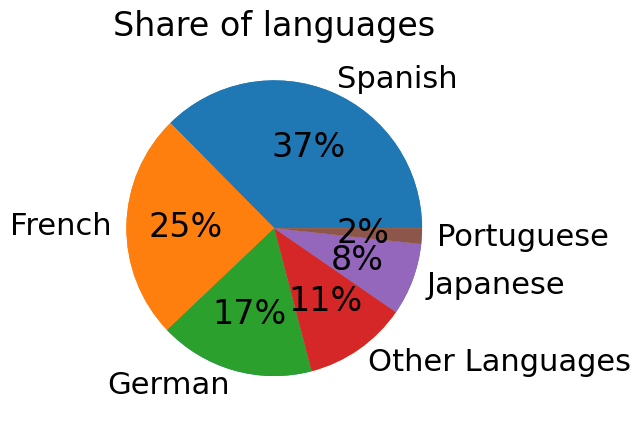

In [19]:
#Show the share of all other languages
x = [218,144,99,66,46,10]
labels = ["Spanish","French", "German", "Other Languages", "Japanese", "Portuguese"]
fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Share of languages')
ax.pie(x)
plt.show()

In [20]:
# applying groupby() function to group the data on language value
books_groupby = b.groupby('Language')

In [21]:
# Print the first entries in all the groups formed
books_groupby.first()

,ID,Title,Authors,Rating,ISBN,num_pages,Rating_Counts,Publication_Date
Language,,,,,,,,
English,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,652,2095690,2006.0
French,80,La Place de la Concorde Suisse,John McPhee,3.92,0374519323,160,698,1994.0
German,2875,Wenn Engel fallen,Tracy Chevalier,3.58,3471772537,384,6,2002.0
Japanese,2885,DEATH NOTE デスノート 1,Tsugumi Ohba/Takeshi Obata/大場 つぐみ/小畑 健,4.43,4088736214,195,227,2004.0
Other,576,1000 Record Covers,Michael Ochs/Patrick Javault/Ulrike Wasel,3.85,3822840858,575,288,2005.0
Portuguese,7838,O Ano do Pensamento Mágico,Joan Didion,3.89,8520918867,224,82,2006.0
Spanish,201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,0606105263,205,6,1984.0


In [22]:
#Finding the values contained in the "Spanish" group
books_groupby.get_group('Spanish')

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
109,201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,0606105263,Spanish,205,6,1984.0
146,324,Cien años de soledad,Gabriel García Márquez,4.07,0785950109,Spanish,448,63,1990.0
150,337,El perfume: Historia de un asesino,Patrick Süskind,4.02,8432216062,Spanish,239,4136,2002.0
255,762,Crónica de una muerte anunciada,Gabriel García Márquez,3.97,1400034957,Spanish,118,7888,2003.0
256,763,Cien años de soledad,Gabriel García Márquez,4.07,0307350428,Spanish,496,130,2006.0
...,...,...,...,...,...,...,...,...,...
11107,45592,La tía Julia y el escribidor,Mario Vargas Llosa,3.92,8466302298,Spanish,566,162,2001.0
11108,45595,La Tía Julia y el Escribidor,Mario Vargas Llosa,3.92,8432203238,Spanish,447,25,1977.0
11109,45604,Narraciones Extraordinarias,Edgar Allan Poe,4.13,9583006408,Spanish,316,36,2004.0
11110,45607,Las Crónicas de Narnia,C.S. Lewis/Margarita E. Valdes/Gemma Gallart/P...,4.26,0061199001,Spanish,816,186,2006.0


<AxesSubplot:xlabel='Rating', ylabel='Count'>

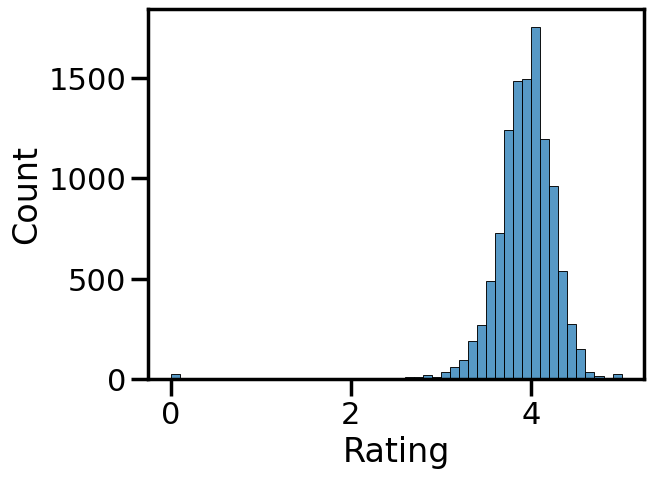

In [52]:
sns.histplot(x=b["Rating"], bins=50)

<function matplotlib.pyplot.show(close=None, block=None)>

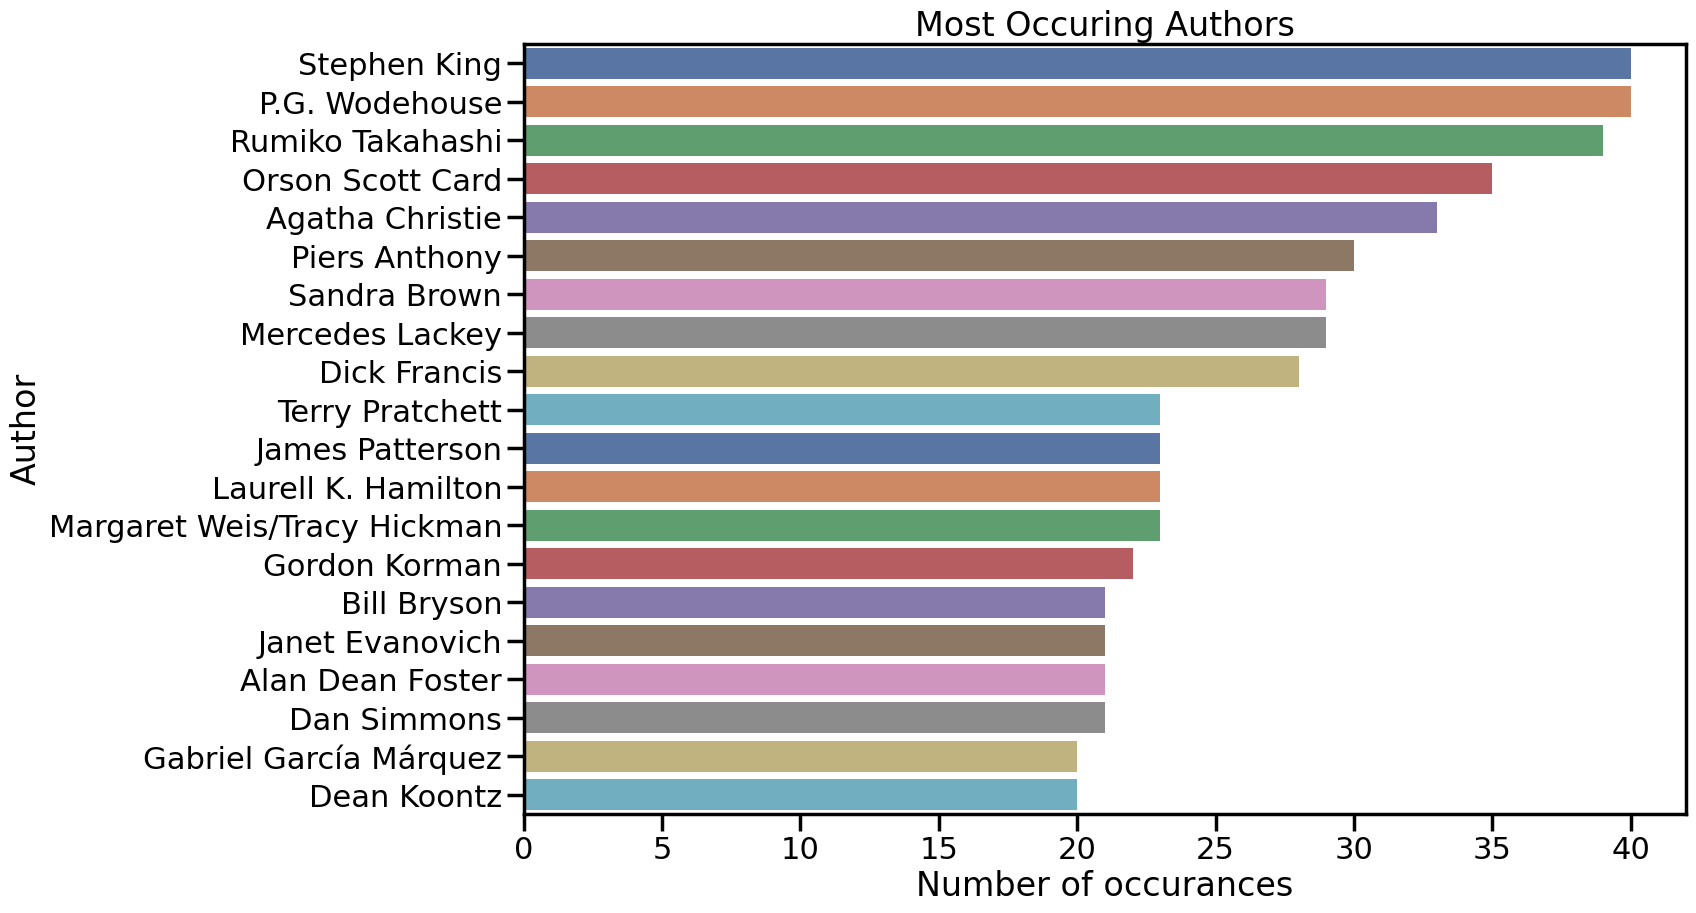

In [50]:
#Who are the authors with most occurances in the list
sns.set_context("poster")
plt.figure(figsize=(15,10))
book = b["Authors"].value_counts()[:20]
sns.barplot(x = book, y = book.index, palette ="deep")
plt.title("Most Occuring Authors")
plt.xlabel("Number of occurances")
plt.ylabel("Author")
plt.show

<AxesSubplot:xlabel='Rating_Counts', ylabel='Title'>

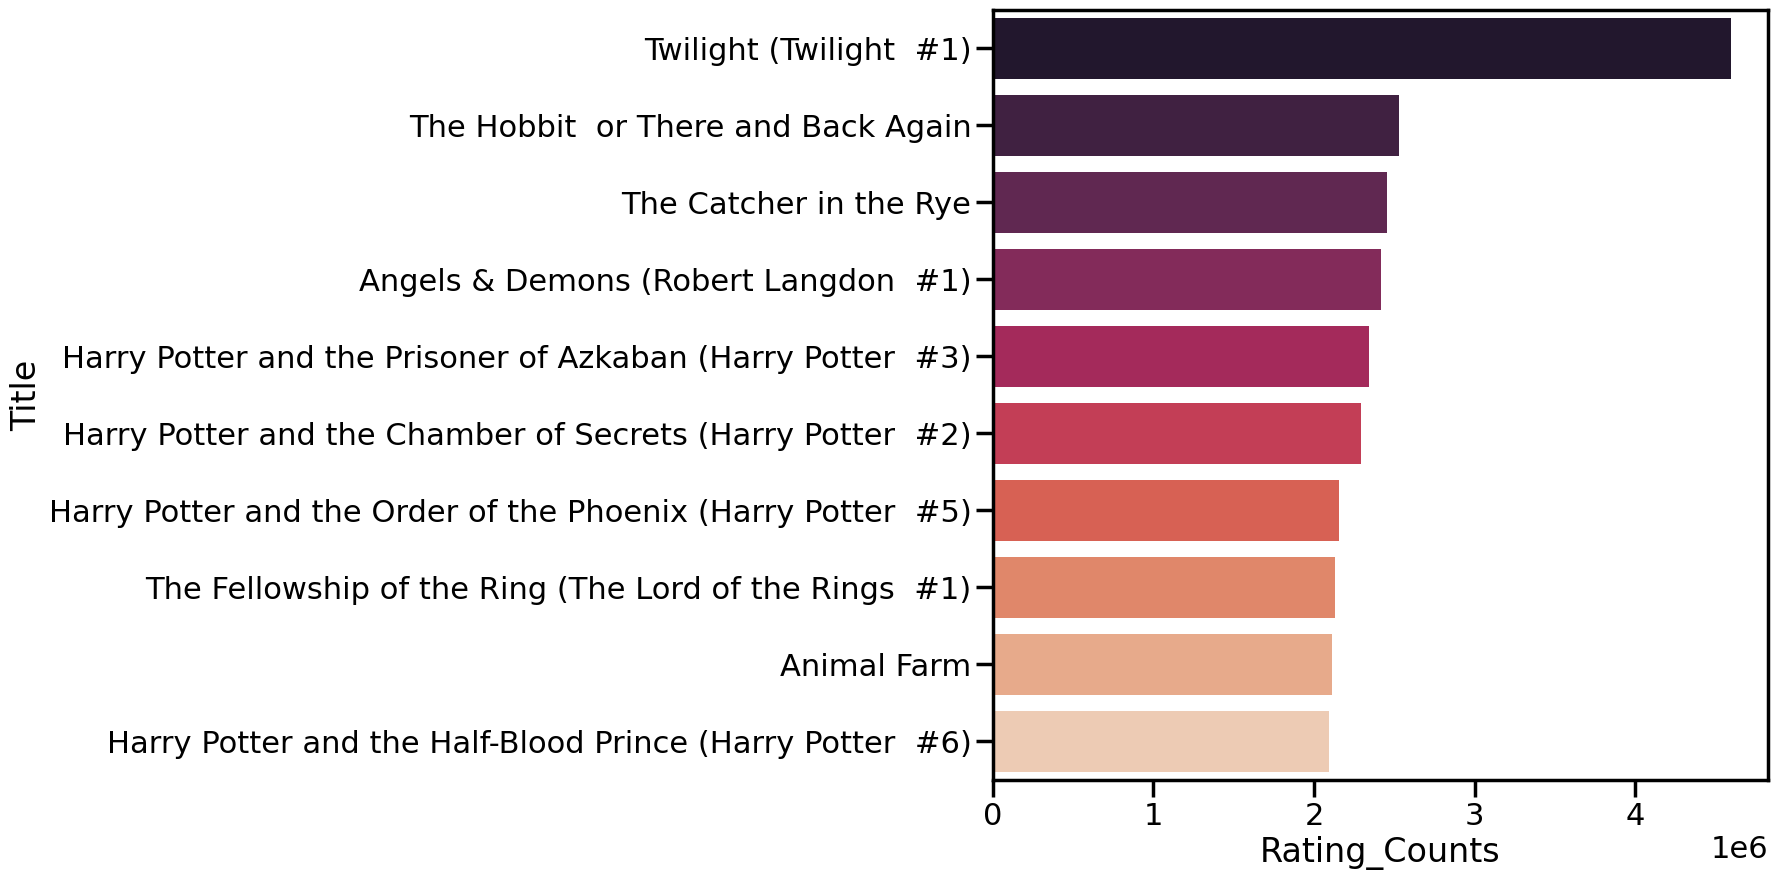

In [51]:
#Which books are most rated
most_rated=b.sort_values("Rating_Counts", ascending=False).head(10).set_index("Title")
plt.figure(figsize=(10,10))
sns.barplot(x=most_rated["Rating_Counts"], y=most_rated.index, palette="rocket")

In [23]:
b

,ID,Title,Authors,Rating,ISBN,Language,num_pages,Rating_Counts,Publication_Date
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,English,652,2095690,2006.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,English,870,2153167,2004.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,English,352,6333,2003.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,English,435,2339585,2004.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,English,2690,41428,2004.0
...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,English,512,156,2004.0
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,English,635,783,1988.0
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,English,415,820,1993.0
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,English,434,769,2007.0


In [24]:
#Importing data
amazon=pd.read_csv(r"C:\Users\ena08\books_two.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ena08\\books_two.csv'

In [ ]:
amazon

In [25]:
Books = pd.merge(amazon, b, on=["Title"], how='inner')
Books.drop_duplicates(subset=['Title'], keep='first', inplace=True, ignore_index=True)

NameError: name 'amazon' is not defined

In [26]:
Books.head(2)

NameError: name 'Books' is not defined

In [27]:
#Adding new columns for the mean value of two existing columns
Books["Average_Rating"] = Books[["Rating_x", "Rating_y"]].mean(axis=1)
Books["Rating_Counts"] = Books [["Rating_Counts_x", "Rating_Counts_y"]].mean(axis=1)

NameError: name 'Books' is not defined

In [28]:
Books.head(2)

NameError: name 'Books' is not defined

In [29]:
#Checking for all the names of column in DataFrame
Books.columns

NameError: name 'Books' is not defined

In [30]:
#Drop unwanted columns
books=Books.drop(['Unnamed: 0', 'Year', "Rank", "Rating_x", 'Rating_Counts_x', '  num_pages', 'Authors_y',
                  'Rating_y', 'ISBN', 'Rating_Counts_y'], axis=1)
books.head(2)

NameError: name 'Books' is not defined

In [31]:
#Rename the columns
books.rename(columns = {"Authors_x":"Authors"}, inplace="True")

NameError: name 'books' is not defined

In [32]:
#Declare a list that is to be converted into a new column
Genre = ["Nonfiction","Nonfiction","Nonfiction","Nonfiction","Fiction","Fiction","Fiction","Fiction","Fiction","Nonfiction",
        "Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Fiction","Nonfiction","Fiction","Nonfiction"]

In [33]:
#Adding a new column
books["Genre"] = Genre

NameError: name 'books' is not defined

In [34]:
#Check for the columns after the change
books.columns

NameError: name 'books' is not defined

In [35]:
#Accesing to specific column
books["Authors"]

NameError: name 'books' is not defined

In [36]:
#Accesing to first 5 rows of specific columns
books[0:5][['Authors', 'Title']]

NameError: name 'books' is not defined

In [37]:
books.head(5)

NameError: name 'books' is not defined

In [38]:
# convert column Price to numpy array
arr = books[["Price"]].to_numpy()
print(arr * 0.92)

NameError: name 'books' is not defined

In [39]:
#Add new column to dataframe with the new price
books['Price_in_Euros'] = arr.tolist()

NameError: name 'arr' is not defined

In [40]:
books.head(2)

NameError: name 'books' is not defined

In [41]:
#Sort data by price in euros from highest to lowest
books_by_price=books.sort_values(["Price_in_Euros"], ascending=False)
books_by_price.head(2)

NameError: name 'books' is not defined

In [42]:
#Adding new column using if function 
books['Acces'] = books.apply(lambda x: 'Expensive'
                             if x['Price'] > 20
                                   else 'Good price', axis=1)
books.head(2)

NameError: name 'books' is not defined

In [43]:
#For loop
for index, row in books.iterrows(): 
    print("Author of the book " + row["Title"] + " is " + row["Authors"] +".")

NameError: name 'books' is not defined

In [44]:
#Check for the books publishe after 2010 
a=books[books['Publication_Date'] >2010]
a

NameError: name 'books' is not defined

In [45]:
# Getting the value count of each genre variable in a dataframe
books['Genre'].value_counts()

NameError: name 'books' is not defined

In [46]:
sns.countplot(x=books["Genre"])

NameError: name 'books' is not defined

In [47]:
#Check the average rating
sns.histplot(books["Average_Rating"])

NameError: name 'books' is not defined

In [48]:
#Which books got the most number of rating
most_rated=books.sort_values("Rating_Counts", ascending=False).head(10).set_index("Title")
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated["Rating_Counts"], y=most_rated.index, palette="bright")

NameError: name 'books' is not defined

In [49]:
books.to_csv('combined_books.csv')

NameError: name 'books' is not defined